In [105]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv("아이브1년치_참여데이터.csv")

In [107]:
df.head()

,Unnamed: 0,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_scost,rpt_time_acost,rpt_time_cost,rpt_time_earn
0,0,2024-07-27,0,4418,761,1,0,0,0,0,0
1,1,2024-07-27,0,7377,213,1,0,0,0,0,0
2,2,2024-07-27,0,7377,337,1,0,0,0,0,0
3,3,2024-07-27,0,7377,496,1,1,230,230,180,180
4,4,2024-07-27,0,7528,792,1,0,0,0,0,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6953146 entries, 0 to 6953145
Data columns (total 11 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Unnamed: 0      int64 
 1   rpt_time_date   object
 2   rpt_time_time   int64 
 3   ads_idx         int64 
 4   mda_idx         int64 
 5   rpt_time_clk    int64 
 6   rpt_time_turn   int64 
 7   rpt_time_scost  int64 
 8   rpt_time_acost  int64 
 9   rpt_time_cost   int64 
 10  rpt_time_earn   int64 
dtypes: int64(10), object(1)
memory usage: 583.5+ MB


### 데이터 전처리

In [109]:
# 광고목록에서 현재 진행중인 광고 찾기

import datetime

ads_list = pd.read_csv("df_list.csv")

ads_list['ads_edate'] = pd.to_datetime(ads_list['ads_edate'], errors='coerce')

# 2025. 8. 29 전 날짜 삭제
compare_date = datetime.date(2025, 8, 29)
condition1 = ads_list['ads_edate'].dt.date >= compare_date
ads_list_filtered = ads_list[condition1]

# delyn이 N인 행만 남기기
ads_list_filtered = ads_list_filtered[ads_list_filtered['delyn'] == 'N']



# # 아이브1년치_참여데이터 불러오기
# ive_time_report = pd.read_csv('아이브1년치_참여데이터.csv', index_col=0)

# # rpt_time_date 컬럼을 datetime 형태로 변경하기
# ive_time_report['rpt_time_date'] = pd.to_datetime(ive_time_report['rpt_time_date'], format='%Y-%m-%d')



# # 교집합의 크기(개수) 계산
# set_a = set(ads_list_filtered['ads_idx'])
# set_b = set(ive_time_report['ads_idx'])

# len(set_a & set_b)

/var/folders/hl/90p2p86n5cs6t3p_1xwxdx2r0000gn/T/ipykernel_99806/2216591216.py:5: DtypeWarning: Columns (12,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  ads_list = pd.read_csv("df_list.csv")
/var/folders/hl/90p2p86n5cs6t3p_1xwxdx2r0000gn/T/ipykernel_99806/2216591216.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ads_list['ads_edate'] = pd.to_datetime(ads_list['ads_edate'], errors='coerce')


In [118]:
ads_list_c = ads_list_filtered[['ads_idx', 'ads_sdate','ads_edate']]

In [119]:
# ads_list_c에 있는 ads_idx만 필터링
df_filtered = df[df['ads_idx'].isin(ads_list_c['ads_idx'])]

# 두 데이터 합치기 (ads_idx 기준)
merged_df = pd.merge(df_filtered, ads_list_c, on='ads_idx', how='inner')

In [120]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436703 entries, 0 to 2436702
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Unnamed: 0      int64         
 1   rpt_time_date   object        
 2   rpt_time_time   int64         
 3   ads_idx         int64         
 4   mda_idx         int64         
 5   rpt_time_clk    int64         
 6   rpt_time_turn   int64         
 7   rpt_time_scost  int64         
 8   rpt_time_acost  int64         
 9   rpt_time_cost   int64         
 10  rpt_time_earn   int64         
 11  ads_sdate       object        
 12  ads_edate       datetime64[ns]
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 241.7+ MB


##### 여기서부터 실험중

In [114]:
merged_df.groupby('ads_idx')["rpt_time_turn"].sum().sort_values(ascending=False).head(10)

ads_idx
19488     248660
133653     88986
11748      88442
93443      76568
119943     76354
9982       55196
91174      54796
355772     49198
119681     44520
94739      42400
Name: rpt_time_turn, dtype: int64

In [141]:
ads_id = 19488

# 특정 광고 필터링 후 mda_idx별 행 개수
mda_counts = merged_df[merged_df['ads_idx'] == ads_id] \
    .groupby('mda_idx').size().reset_index(name='counts') \
    .sort_values('counts', ascending=False)

print(mda_counts)


     mda_idx  counts
4        213    3614
28       496    2513
43       579    2307
78       701    2292
76       688    2179
..       ...     ...
11       322       1
128      847       1
19       409       1
24       466       1
102      791       1

[173 rows x 2 columns]


In [142]:
ads_id =19488 

result = merged_df[merged_df['ads_idx'] == ads_id] \
    .groupby('mda_idx')['ads_sdate'] \
    .apply(lambda x: sorted(x.unique())) \
    .reset_index(name='unique_start_dates')

print(result)

     mda_idx     unique_start_dates
0         22  [2022-09-23 12:00:00]
1         28  [2022-09-23 12:00:00]
2         30  [2022-09-23 12:00:00]
3         54  [2022-09-23 12:00:00]
4        213  [2022-09-23 12:00:00]
..       ...                    ...
168     1046  [2022-09-23 12:00:00]
169     1047  [2022-09-23 12:00:00]
170     1048  [2022-09-23 12:00:00]
171     1051  [2022-09-23 12:00:00]
172     1061  [2022-09-23 12:00:00]

[173 rows x 2 columns]


In [139]:
merged_df.groupby('ads_idx')["ads_sdate"].nunique().sort_values(ascending=False).head(10)

ads_idx
2595      1
163144    1
163162    1
163161    1
163160    1
163159    1
163157    1
163156    1
163155    1
163154    1
Name: ads_sdate, dtype: int64

In [124]:
merged_df.groupby('ads_idx')["ads_sdate"].nunique().sort_values(ascending=False).head(10)


ads_idx
2595      1
163144    1
163162    1
163161    1
163160    1
163159    1
163157    1
163156    1
163155    1
163154    1
Name: ads_sdate, dtype: int64

In [150]:
# ads × mda별 rpt_time_date 유니크 개수
unique_counts = merged_df.groupby(['ads_idx', 'mda_idx'])['rpt_time_date'].nunique()

# 최대, 최소, 평균
max_count = unique_counts.max()
min_count = unique_counts.min()
mean_count = unique_counts.mean()

print(f"최대 유니크 날짜 개수: {max_count}")
print(f"최소 유니크 날짜 개수: {min_count}")
print(f"평균 유니크 날짜 개수: {mean_count:.2f}")


최대 유니크 날짜 개수: 399
최소 유니크 날짜 개수: 1
평균 유니크 날짜 개수: 17.43


In [129]:
merged_df.groupby('ads_idx')["mda_idx"].count().sort_values(ascending=False).head(10)

ads_idx
133653    207347
19488      92496
28781      59237
73878      53513
21037      48989
6667       46018
14074      37532
21038      28622
20256      26788
56225      25074
Name: mda_idx, dtype: int64

In [130]:
merged_df.groupby('ads_idx')["mda_idx"].nunique().sort_values(ascending=False)


ads_idx
19488     173
133653    166
6667      164
13928     145
119943    140
         ... 
72964       1
130269      1
130270      1
70424       1
385444      1
Name: mda_idx, Length: 1751, dtype: int64

In [127]:
merged_df.groupby('mda_idx')["ads_sdate"].nunique().sort_values(ascending=False).head(10)


mda_idx
270    838
371    483
790    475
281    460
761    456
246    433
54     416
22     412
817    391
337    390
Name: ads_sdate, dtype: int64

In [145]:
result = merged_df.groupby(['ads_idx', 'mda_idx'])['ads_sdate'] \
    .apply(list) \
    .reset_index(name='start_dates')

print(result.head(10))

   ads_idx  mda_idx                                        start_dates
0     2595       54  [2018-09-14 12:00:00, 2018-09-14 12:00:00, 201...
1     2595      246  [2018-09-14 12:00:00, 2018-09-14 12:00:00, 201...
2     2595      270  [2018-09-14 12:00:00, 2018-09-14 12:00:00, 201...
3     2595      290         [2018-09-14 12:00:00, 2018-09-14 12:00:00]
4     2595      337  [2018-09-14 12:00:00, 2018-09-14 12:00:00, 201...
5     2595      389                              [2018-09-14 12:00:00]
6     2595      482                              [2018-09-14 12:00:00]
7     2595      583  [2018-09-14 12:00:00, 2018-09-14 12:00:00, 201...
8     2595      630         [2018-09-14 12:00:00, 2018-09-14 12:00:00]
9     2595      761  [2018-09-14 12:00:00, 2018-09-14 12:00:00, 201...


In [134]:
ads_id =19488 

result = merged_df[merged_df['ads_idx'] == ads_id] \
    .groupby('mda_idx')['ads_sdate'] \
    .apply(lambda x: sorted(x.unique())) \
    .reset_index(name='unique_start_dates')

print(result)

   mda_idx     unique_start_dates
0       22  [2025-06-10 17:00:00]
1       73  [2025-06-10 17:00:00]
2      270  [2025-06-10 17:00:00]
3      281  [2025-06-10 17:00:00]
4      371  [2025-06-10 17:00:00]
5      539  [2025-06-10 17:00:00]
6      540  [2025-06-10 17:00:00]
7      645  [2025-06-10 17:00:00]
8      790  [2025-06-10 17:00:00]
9      854  [2025-06-10 17:00:00]


#####여기서부턴 원상복귀

In [ ]:
# # 전환수가 클리수볻다 큰 경우 제거
# merged_df = merged_df[merged_df['rpt_time_clk'] >= merged_df['rpt_time_turn']]

In [63]:
# 고유 ID 생성: ads_idx와 mda_idx를 결합
merged_df["unique_id"] = (
    merged_df["ads_idx"].astype(str).str.zfill(6) +   # ads_idx는 항상 6자리
    merged_df["mda_idx"].astype(str).str.zfill(4)     # mda_idx는 항상 4자리
)

# 필요하다면 숫자로 변환
merged_df["unique_id"] = merged_df["unique_id"].astype(int)

/var/folders/hl/90p2p86n5cs6t3p_1xwxdx2r0000gn/T/ipykernel_99806/716114964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["unique_id"] = (
/var/folders/hl/90p2p86n5cs6t3p_1xwxdx2r0000gn/T/ipykernel_99806/716114964.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["unique_id"] = merged_df["unique_id"].astype(int)


In [64]:
merged_df["unique_id"].nunique()

26378

In [65]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375380 entries, 0 to 2436702
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Unnamed: 0      int64         
 1   rpt_time_date   object        
 2   rpt_time_time   int64         
 3   ads_idx         int64         
 4   mda_idx         int64         
 5   rpt_time_clk    int64         
 6   rpt_time_turn   int64         
 7   rpt_time_scost  int64         
 8   rpt_time_acost  int64         
 9   rpt_time_cost   int64         
 10  rpt_time_earn   int64         
 11  ads_edate       datetime64[ns]
 12  unique_id       int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 253.7+ MB


In [66]:
df_time = merged_df[["unique_id", "rpt_time_date", "rpt_time_turn"]].copy()

In [67]:
# 일 단위로 집계

df_time["rpt_time_date"] = pd.to_datetime(df_time["rpt_time_date"])

# 그룹화
df_day = (
    df_time.groupby(["unique_id", "rpt_time_date"], as_index=False)["rpt_time_turn"].sum()
    .rename(columns={"rpt_time_turn": "turn_sum"})
)

In [68]:
df_day.head()

,unique_id,rpt_time_date,turn_sum
0,25950054,2025-03-22,11
1,25950054,2025-03-23,4
2,25950054,2025-03-24,5
3,25950054,2025-03-25,0
4,25950054,2025-03-26,1


In [69]:

df_day["unique_id"] = df_day["unique_id"].astype("category")


###  타깃값 분포 확인

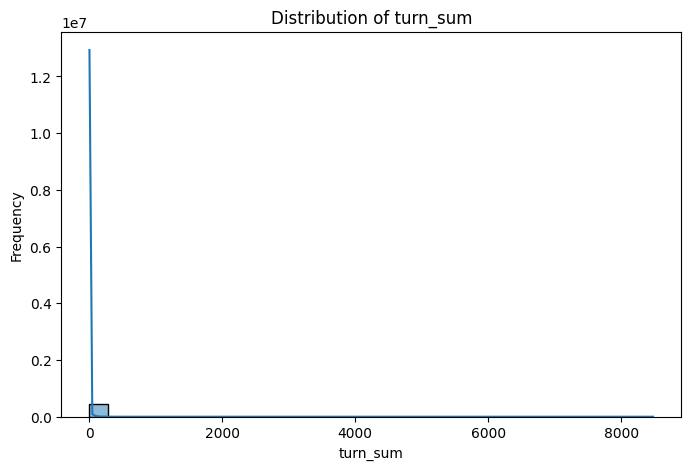

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 + KDE
plt.figure(figsize=(8,5))
sns.histplot(df_week["turn_sum"], bins=30, kde=True)
plt.title("Distribution of turn_sum")
plt.xlabel("turn_sum")
plt.ylabel("Frequency")
plt.show()


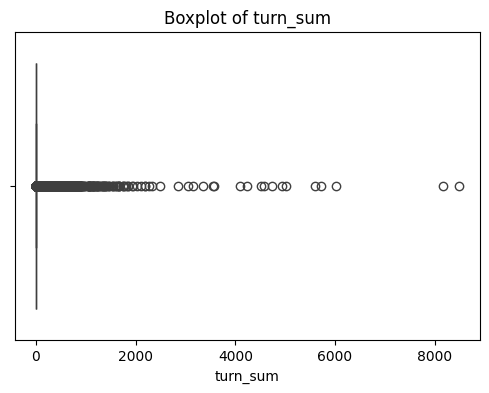

In [71]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_week["turn_sum"])
plt.title("Boxplot of turn_sum")
plt.show()

In [72]:
(df_week["turn_sum"]==0).sum()

293339

In [73]:
zero_count = (df_week["turn_sum"] == 0).sum()
nonzero_count = (df_week["turn_sum"] > 0).sum()
zero_ratio = zero_count / len(df_week)

print(f"0인 비율: {zero_ratio:.2%} ({zero_count:,}개)")
print(f"0이 아닌 비율: {1-zero_ratio:.2%} ({nonzero_count:,}개)")

0인 비율: 63.75% (293,339개)
0이 아닌 비율: 36.25% (166,836개)


In [74]:
# 아이디별 전환수 합계
id_sum = df_week.groupby("unique_id", as_index=False)["turn_sum"].sum()

# 전환수 합계 > 0인 아이디 개수
positive_count = (id_sum["turn_sum"] > 0).sum()

# 전환수 합계 == 0인 아이디 개수
zero_count = (id_sum["turn_sum"] == 0).sum()

print("전환수 > 0인 아이디 수:", positive_count)
print("전환수 == 0인 아이디 수:", zero_count)

전환수 > 0인 아이디 수: 13174
전환수 == 0인 아이디 수: 13222


### 타깃값 로그 변환

In [75]:
import numpy as np

# turn_sum 로그 변환 (0 포함 가능) y=log(1+x)
df_day["turn_sum_log"] = np.log1p(df_day["turn_sum"])

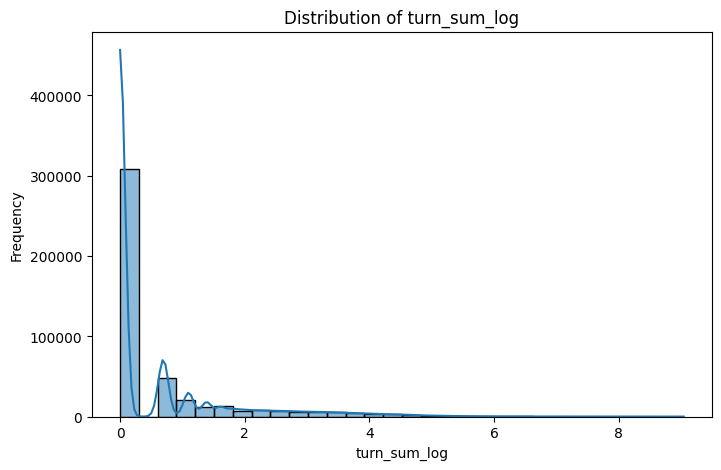

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 + KDE
plt.figure(figsize=(8,5))
sns.histplot(df_day["turn_sum_log"], bins=30, kde=True)
plt.title("Distribution of turn_sum_log")
plt.xlabel("turn_sum_log")
plt.ylabel("Frequency")
plt.show()


### 모델링

#### 데이터 분리

In [77]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456351 entries, 0 to 456350
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   unique_id      456351 non-null  category      
 1   rpt_time_date  456351 non-null  datetime64[ns]
 2   turn_sum       456351 non-null  int64         
 3   turn_sum_log   456351 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 12.5 MB


In [78]:
# 각 아이디별로 날짜 개수 세기 약 6천개 지워야 함....
# 아이디별 날짜 개수 계산
date_counts = df_day.groupby("unique_id")["rpt_time_date"].nunique()

# 2개 미만인 아이디만 필터
ids_less_than_2 = date_counts[date_counts < 2].index

# 해당 아이디 데이터 확인
df_day[df_day["unique_id"].isin(ids_less_than_2)]

,unique_id,rpt_time_date,turn_sum,turn_sum_log
95,25950290,2024-12-01,0,0.000000
222,25950389,2024-09-13,1,0.693147
223,25950482,2025-01-08,0,0.000000
2415,66670411,2024-08-27,1,0.693147
2636,66670453,2024-08-18,0,0.000000
...,...,...,...,...
456319,4469020645,2025-08-25,0,0.000000
456320,4469020854,2025-08-25,0,0.000000
456321,4469021037,2025-08-25,0,0.000000
456332,4469170766,2025-08-25,0,0.000000


In [79]:
# 1️⃣ 날짜가 2개 미만인 아이디 제거
date_counts = df_day.groupby("unique_id")["rpt_time_date"].nunique()
valid_ids = date_counts[date_counts >= 2].index
df_day = df_day[df_day["unique_id"].isin(valid_ids)]

In [80]:
df_day["date_int"] = df_day["rpt_time_date"].dt.strftime("%Y%m%d").astype(int)

In [81]:
import pandas as pd


train_list = []
test_list = []

for ad_id, group in df_day.groupby("unique_id"):
    group = group.sort_values("rpt_time_date")
    
    # 마지막 날짜를 test로 분리
    test = group.tail(1)
    train = group.iloc[:-1]
    
    train_list.append(train)
    test_list.append(test)

train_df = pd.concat(train_list)
test_df = pd.concat(test_list)


In [82]:
# 3️⃣ 확인
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (429973, 5)
Test shape: (20270, 5)


In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429973 entries, 0 to 456349
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   unique_id      429973 non-null  category      
 1   rpt_time_date  429973 non-null  datetime64[ns]
 2   turn_sum       429973 non-null  int64         
 3   turn_sum_log   429973 non-null  float64       
 4   date_int       429973 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 18.4 MB


In [84]:
features = ["unique_id", "date_int"]  # 필요하면 요일/월 등 추가 가능
target = "turn_sum_log"

In [85]:
# 로그변환된 target을 지수변환하기 위한 함수
def exp_transform(y):
    return np.expm1(y)  # log1p -> expm1, 0 값도 안전하게 처리

# MAPE 계산 함수
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100

#### RandomForestRegressor

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# 모델 초기화
rf = RandomForestRegressor()

# 1️⃣ Train 데이터 학습
rf.fit(train_df[features], train_df[target])

# 2️⃣ Train 데이터 예측
pred_train = rf.predict(train_df[features])

pred_train_exp = exp_transform(pred_train)
y_train_exp = exp_transform(train_df[target])

# 3️⃣ Train 성능 평가
mse_train = mean_squared_error(y_train_exp, pred_train_exp)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_exp, pred_train_exp)
r2_train = r2_score(y_train_exp, pred_train_exp)
mape_train = mean_absolute_percentage_error(y_train_exp, pred_train_exp)

print("Train 성능:")
print(f"R2: {r2_train:.4f}, MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.2f}%")



Train 성능:
R2: 0.5199, MAE: 3.08, MSE: 857.08, RMSE: 29.28, MAPE: 1324119287.33%


In [88]:
# 4️⃣ Test 데이터 예측
pred_test = rf.predict(test_df[features])

pred_test_exp = exp_transform(pred_test)
y_test_exp = exp_transform(test_df[target])

# 5️⃣ Test 성능 평가
mse_test = mean_squared_error(y_test_exp, pred_test_exp)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_exp, pred_test_exp)
r2_test = r2_score(y_test_exp, pred_test_exp)
mape_test = mean_absolute_percentage_error(y_test_exp, pred_test_exp)

print("Test 성능:")
print(f"R2: {r2_test:.4f}, MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.2f}%")

Test 성능:
R2: 0.0964, MAE: 8.46, MSE: 5392.51, RMSE: 73.43, MAPE: 4717518876.35%


#### XGBoost

In [89]:
import xgboost
print(xgboost.__version__)

2.1.1


In [100]:
import xgboost as xgb

# 모델 초기화
xgb_model = xgb.XGBRegressor(enable_categorical=True)

# 1️⃣ Train 데이터 학습
xgb_model.fit(train_df[features], train_df[target])

# 2️⃣ Train 데이터 예측
pred_train = xgb_model.predict(train_df[features])

pred_train_exp = exp_transform(pred_train)
y_train_exp = exp_transform(train_df[target])

# 3️⃣ Train 성능 평가
mse_train = mean_squared_error(y_train_exp, pred_train_exp)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_exp, pred_train_exp)
r2_train = r2_score(y_train_exp, pred_train_exp)
mape_train = mean_absolute_percentage_error(y_train_exp, pred_train_exp)

print("Train 성능:")
print(f"R2: {r2_train:.4f}, MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.2f}%")



Train 성능:
R2: 0.5434, MAE: 3.28, MSE: 815.12, RMSE: 28.55, MAPE: 1829784019.41%


In [101]:
# 4️⃣ Test 데이터 예측
pred_test = xgb_model.predict(test_df[features])

pred_test_exp = exp_transform(pred_test)
y_test_exp = exp_transform(test_df[target])

# 5️⃣ Test 성능 평가
mse_test = mean_squared_error(y_test_exp, pred_test_exp)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_exp, pred_test_exp)
r2_test = r2_score(y_test_exp, pred_test_exp)
mape_test = mean_absolute_percentage_error(y_test_exp, pred_test_exp)

print("Test 성능:")
print(f"R2: {r2_test:.4f}, MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.2f}%")

Test 성능:
R2: 0.4228, MAE: 6.41, MSE: 3444.93, RMSE: 58.69, MAPE: 2490604683.86%


In [104]:
y_pred = xgb_model.predict( test_df.loc[ 
    (test_df['unique_id'] == 25950054) & (test_df['date_int'] == 20250404), features ] ) 


# 실제값 추출
y_true = test_df.loc[
    (test_df['unique_id'] == 25950054) & (test_df['date_int'] == 20250404),
    target
]

# exp_transform을 쓰신다면 실제/예측 모두 변환
y_true_exp = exp_transform(y_true)
y_pred_exp = exp_transform(y_pred)

# 비교 출력
print("실제값:", y_true_exp.values)
print("예측값:", y_pred_exp)

# 차이
print("오차:", (y_true_exp.values - y_pred_exp))


실제값: [1.]
예측값: [0.87848884]
오차: [0.12151116]


#### LGBM

In [95]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor()

# 1️⃣ Train 데이터 학습
lgb_model.fit(train_df[features], train_df[target])

# 2️⃣ Train 데이터 예측
pred_train = lgb_model.predict(train_df[features])

pred_train_exp = exp_transform(pred_train)
y_train_exp = exp_transform(train_df[target])

# 3️⃣ Train 성능 평가
mse_train = mean_squared_error(y_train_exp, pred_train_exp)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_exp, pred_train_exp)
r2_train = r2_score(y_train_exp, pred_train_exp)
mape_train = mean_absolute_percentage_error(y_train_exp, pred_train_exp)

print("Train 성능:")
print(f"R2: {r2_train:.4f}, MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.2f}%")



[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11184
[LightGBM] [Info] Number of data points in the train set: 429973, number of used features: 2
[LightGBM] [Info] Start training from score 0.583240
Train 성능:
R2: 0.2597, MAE: 4.00, MSE: 1321.71, RMSE: 36.36, MAPE: 2199887050.04%


In [96]:
# 4️⃣ Test 데이터 예측
pred_test = lgb_model.predict(test_df[features])

pred_test_exp = exp_transform(pred_test)
y_test_exp = exp_transform(test_df[target])

# 5️⃣ Test 성능 평가
mse_test = mean_squared_error(y_test_exp, pred_test_exp)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_exp, pred_test_exp)
r2_test = r2_score(y_test_exp, pred_test_exp)
mape_test = mean_absolute_percentage_error(y_test_exp, pred_test_exp)

print("Test 성능:")
print(f"R2: {r2_test:.4f}, MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.2f}%")

Test 성능:
R2: -0.0023, MAE: 8.59, MSE: 5981.53, RMSE: 77.34, MAPE: 2905475386.83%
